In [41]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [39]:
# Create folder if does not exist
import os
path = 'drive/MyDrive/RADIONICA_FPZ_Datalab/Podatci/'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

# If the path not exist, create fodler structure
if not isExist:
  os.makedirs(path)
  print(f"Folder created at: {path}")


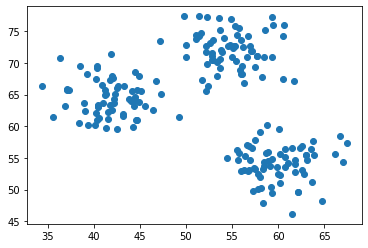

In [19]:
# Create dataset for culustering/classification.
x, y = make_blobs(n_samples=200, 
                  n_features=2, 
                  random_state=0, 
                  cluster_std=3,
                  center_box=(0, 100))

plt.scatter(x[:,0], x[:,1])
plt.show()

In [40]:
# Save data to pandas dataframe
df = pd.DataFrame(x, columns=["speed", "density"])
df.to_csv(f"{path}clustering.csv")

df["class"] = y
df.to_csv(f"{path}classification.csv")


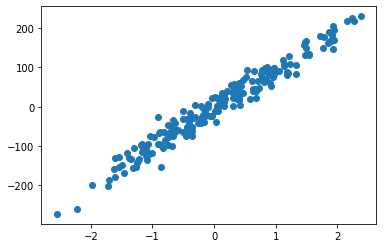

In [49]:
# Make regression dataset
x, y = make_regression(n_samples=200, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20, 
                       random_state=0)
plt.scatter(x, y)
plt.show()

In [61]:
def change_scale(oldValue, oldMin, oldMax, newMin, newMax):
  """ change_scale Scales value to defined scale.
  """
  oldRange = oldMax - oldMin
  newRange = newMax - newMin
  return ((oldValue - oldMin) * newRange / oldRange) + newMin

In [71]:
# Scaling x values.
oldMax = x.max()
oldMin = x.min()
newMin = 0
newMax = 100

scaled_x = list(map(lambda x: change_scale(x, oldMin, oldMax, newMin, newMax), x))

# Scaling y values.
oldMax = y.max()
oldMin = y.min()
newMin = 50
newMax = 1000

scaled_y = list(map(lambda y: change_scale(y, oldMin, oldMax, newMin, newMax), y))

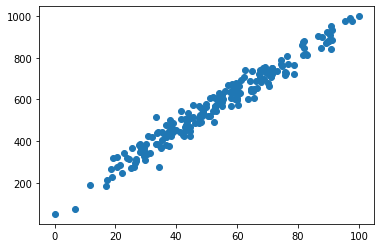

In [72]:
plt.scatter(scaled_x, scaled_y)
plt.show()

In [81]:
df = pd.DataFrame(scaled_x, columns=["days"])
df["price"] = scaled_y
df.to_csv(f"{path}regression.csv")